In [1]:
# https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
import sys
sys.path.insert(1, '../../python_scripts')
from fourier import *

# Fourier transform and Rectangular function

## The function

Given $M > 0$, the rectangular function $\chi_M$  is defined as follows

$$ \chi_M (t) = \begin{cases} 0 & \text{if $|t| > \frac{M}{2}$} , \\ 1 & \text{else} \end{cases} \, .$$

In [2]:
def rect(t, M, a):
    if np.abs(t - a) > M/2:
        return 0
    elif np.abs(t - a) == M/2:
        return 1/2
    else:
        return 1

In [3]:
# Arguments
M = 1
a = 0
dt = .01 # dt : sample spacing 
N = 2500 # sample size (N/2 is the number the positive frequencies)

func = lambda t : rect(t, M, a)
x, T = construct_discrete_signal_starting_from_0(dt, N, func)

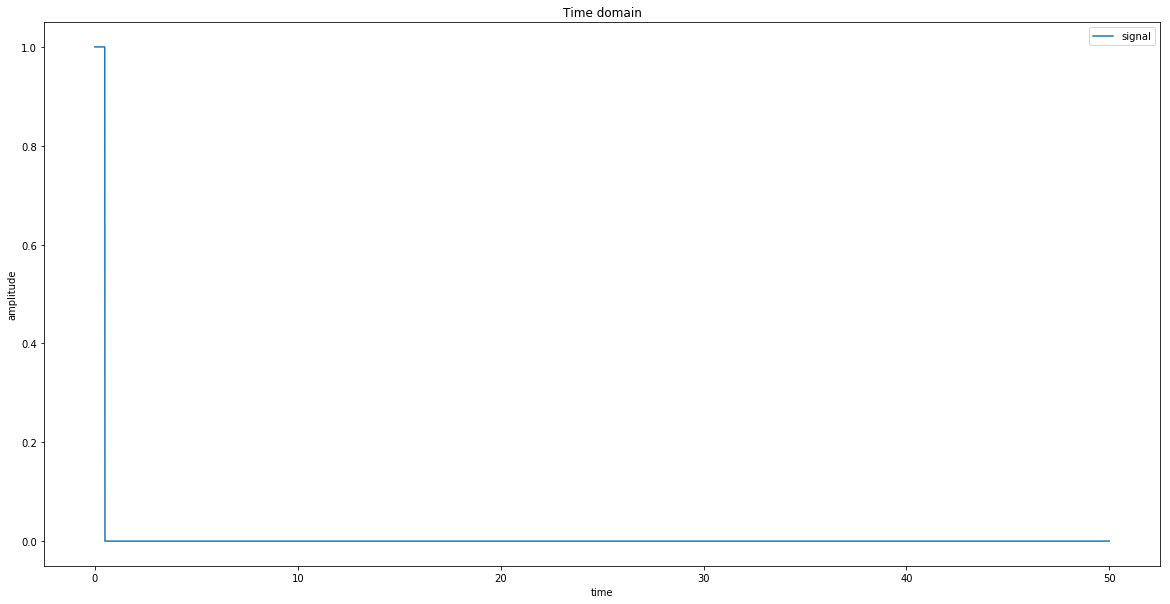

In [4]:
# Arguments
Xs = [T]
L = [x]
Labels = ["signal"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## 1) Retrieving the Fourier transform and computing the DFT

\begin{align} 
\chi_M (\xi) &= \int_{- \infty}^{+ \infty} \chi_M (t) e^{- i 2 \pi \xi t} dt \\
& = \int_{- \frac{M}{2}}^{\frac{M}{2}} e^{- i 2 \pi \xi t} dt \\
& = - \frac{1}{i 2 \pi \xi} \left[ e^{- i 2 \pi \frac{M}{2} \xi} - e^{+ i 2 \pi \frac{M}{2} \xi} \right] \\
& = - \frac{1}{i 2 \pi \xi} \left[ - 2 i \sin \left( \pi M \xi \right) \right] \\
& = \frac{\sin\left(\pi M \xi \right)}{\pi \xi} \\
& = M sinc (M \xi)
\end{align}

### DFT

If we sample the signal $f$ $N$ times at moments $t_n = d n$ we would get the sampled signal $x_n = f(t_n), n = 0, \dots, N - 1$. The fft program in numpy computes the $N$ Fourier coefficients $X_k$ associated to the frequencies $\xi_k = \frac{k}{dN}$ with 

$$k = \begin{cases} - \frac{N}{2}, \dots, 0, \dots \frac{N}{2} - 1 & \text{ if $N$ is even } \\ - \frac{N - 1}{2}, \dots, 0, \dots \frac{N - 1}{2} & \text{ if $N$ is odd } \end{cases} \, .$$ 

Using the formula 

$$ X_k  =  \sum_{n= 0}^{N - 1} x_n e^{- i 2 \pi \frac{nk}{N} } \, ,$$

which derives from 

\begin{align} X_k  & =  \sum_{n= 0}^{N - 1} x_n e^{- i 2 \pi t_n \xi_k } \\ & = \sum_{n= 0}^{N - 1} x_n e^{- i 2 \pi nd \frac{k}{dN} } \\ & = \sum_{n= 0}^{N - 1} x_n e^{- i 2 \pi \frac{nk}{N} } \, . \end{align}

In [5]:
X_noshift, Xi, X = retrieve_frequencies(x, N, dt)
X = 2*X/(2*N) # we compensate the fact that we sample only half of the signal by multiplying by 2

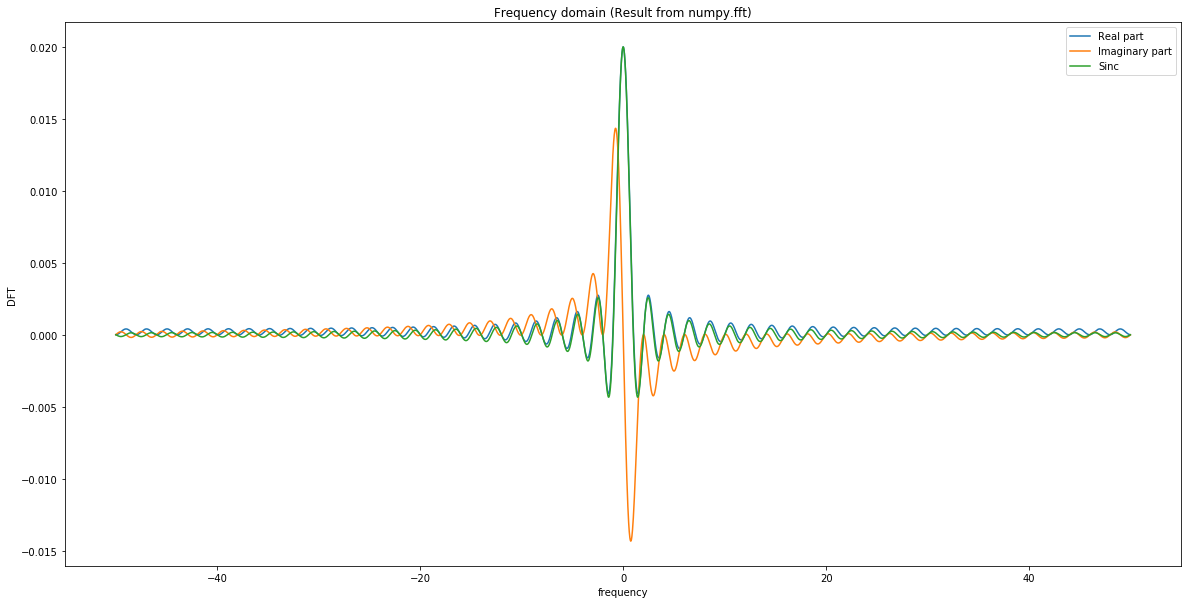

In [6]:
# Arguments
Xs = [Xi, Xi, Xi]
L = [np.real(X), np.imag(X), 1/(2*N*dt)*np.sinc(Xi)]
Labels = ["Real part", "Imaginary part", "Sinc"]
title = "Frequency domain (Result from numpy.fft)"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## 2 ) The Fourier transform of the shifted rectangular function

Let $M > 0$ and $a \in \mathbb{R}$. The shifted rectangular function $\chi_{M, a}$ is given by

$$ \chi_{M, a} (t) = \begin{cases} 0 & \text{if $|t - a| > \frac{M}{2}$} , \\ 1 & \text{else} \end{cases} \, .$$

Knowing that $\chi_{M, a} (t) = \chi_M (t - a)$, we find its Fourier transform

\begin{align} 
\chi_{M, a} (\xi) &= \int_{- \infty}^{+ \infty} \chi_{M, a} (t) e^{- i 2 \pi \xi t} dt \\
& = \int_{- \infty}^{+\infty} \chi_{M, a} (s + a) e^{- i 2 \pi \xi (s + a)} ds \\
& = e^{- i 2 \pi \xi a} \int_{- \infty}^{+\infty} \chi_M (s) e^{- i 2 \pi \xi s} ds \\
& = e^{- i 2 \pi \xi a} sinc( M \xi )
\end{align}

In [7]:
# Arguments
M = 1
a = 3

func_a = lambda t : rect(t, M, a)
x_a, T = construct_discrete_signal_starting_from_0(dt, N, func_a)
X_noshift_a, Xi, X_a = retrieve_frequencies(x_a, N, dt)
X_a = X_a/(2*N)

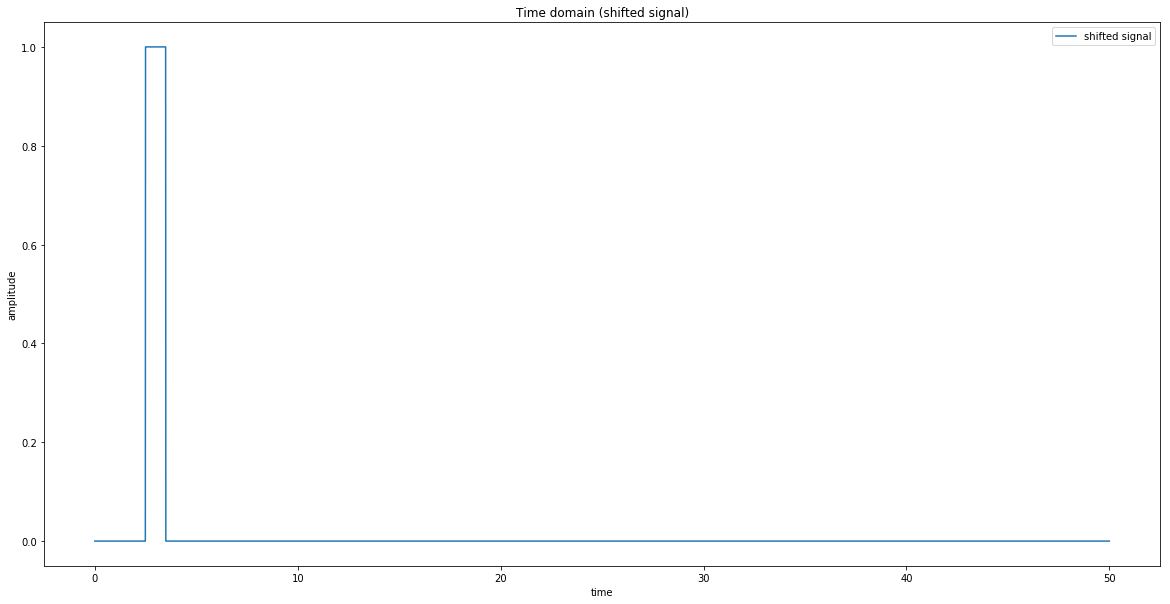

In [8]:
# Arguments
Xs = [T]
L = [x_a]
Labels = ["shifted signal"]
title = "Time domain (shifted signal)"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

/usr/lib/python3/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


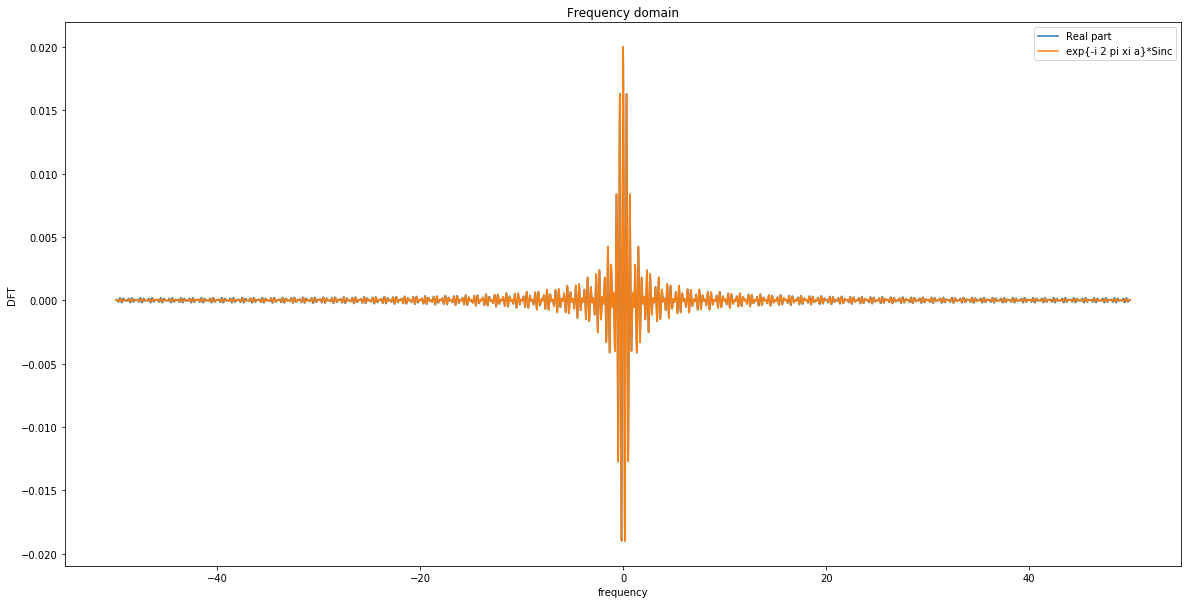

In [9]:
# Arguments
Xs = [Xi, Xi, Xi]
L = [np.real(X_a), np.exp(-1j*2*np.pi*Xi*a)/(2*N*dt)*np.sinc(Xi)]
Labels = ["Real part", "exp{-i 2 pi xi a}*Sinc"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

We can see that the imaginary part is not null for both shifted and nonshifted signals, this is because we sampled the signal on $\mathbb{R}^+$ and we lost the symmetry. To fix that let us sample over positive and negative times. 

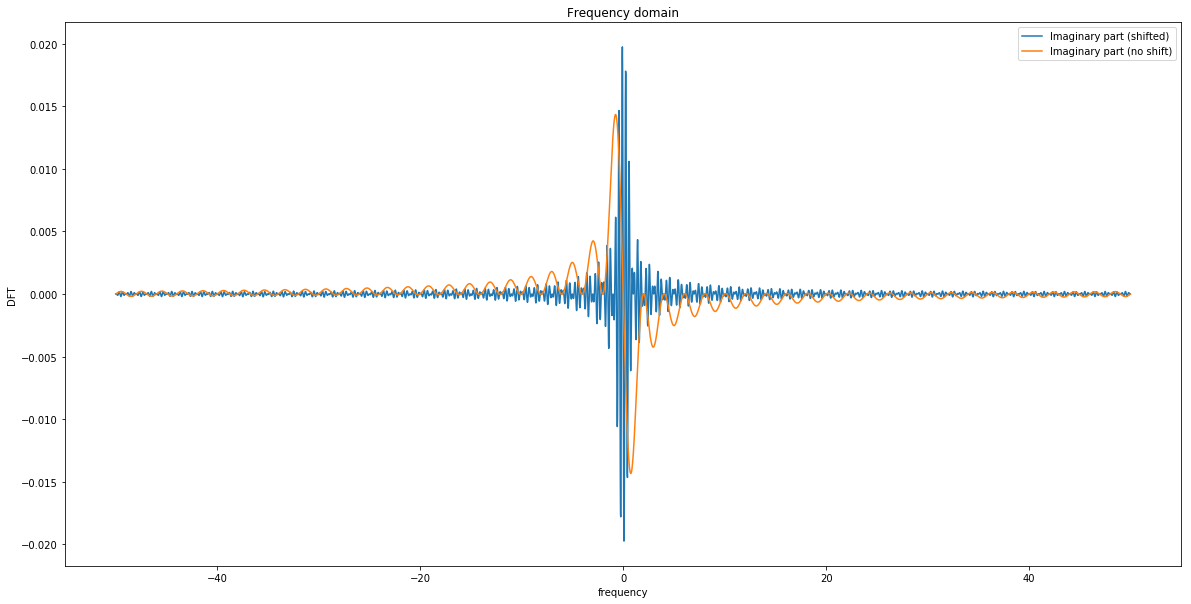

In [10]:
# Arguments
Xs = [Xi, Xi]
L = [np.imag(X_a), np.imag(X)]
Labels = ["Imaginary part (shifted)", "Imaginary part (no shift)"]
title = "Frequency domain"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

## 3 ) Sample centered at 0

Let us consider a sample centered at $0$, at points $t_n = dn - \frac{dN}{2} \, , n = 1, \dots, N - 1$.

In [11]:
# Arguments
M = 1
a = 0
dt = .01 # dt : sample spacing 
N = 2500 # sample size (N/2 is the number the positive frequencies)

func = lambda t : rect(t, M, a)
x_centered, T_centered = construct_discrete_signal_centered_at_0(dt, N, func)
X_noshift_centered, Xi, X_centered = retrieve_frequencies(x_centered, N, dt)
X_centered = X_centered/(2*N)

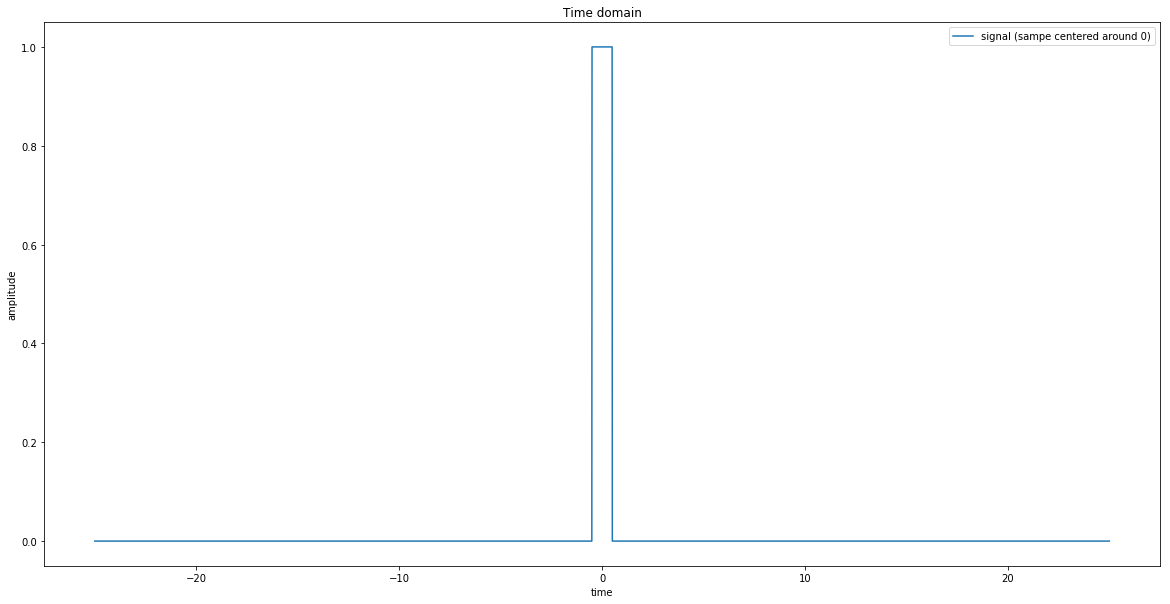

In [12]:
# Arguments
Xs = [T_centered]
L = [x_centered]
Labels = ["signal (sampe centered around 0)"]
title = "Time domain"
xLabel = "time"
yLabel = "amplitude"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

We plot the result returned by nupy.fft.

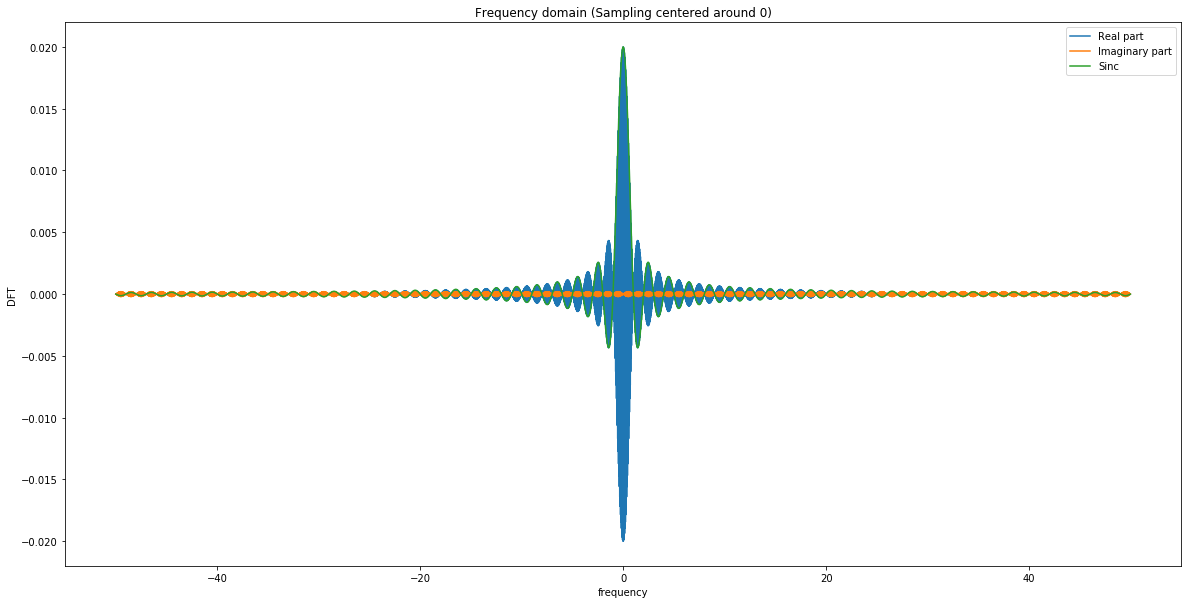

In [13]:
# Arguments
Xs = [Xi, Xi, Xi]
L = [np.real(X_centered), np.imag(X_centered), 1/(2*N*dt)*np.sinc(Xi)]
Labels = ["Real part", "Imaginary part", "Sinc"]
title = "Frequency domain (Sampling centered around 0)"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

We see that we do not get the graph of sinc. This is actually due to the fact that fft in numpy considers signals that start from $0$ sampled at moments $t_n = dn, n = 0, \dots, N - 1$. If it is sampled at moments $t_n = dn - \frac{dN}{2}$ like we did for the previous graph we would get

\begin{align} 
\tilde{X}_k & = \sum_{n = 0}^{N - 1} x_n e^{- i 2 \pi t_n \xi_k} \\
& = \sum_{n = 0}^{N - 1} x_n e^{- i 2 \pi \left(dn - \frac{dn}{2} \right) \frac{k}{dN} } \\
& = \sum_{n = 0}^{N - 1} x_n e^{- 2 \pi \frac{kn}{N} + i \pi k} \\
& = e^{i k \pi} \sum_{n = 0}^{N - 1} x_n e^{ - i 2 \pi \frac{kn}{N} } \\
& = \left( - 1 \right)^k X_k \, .
\end{align}

Which means that we have odd frequencies multiplied by -1. From here we can correct the previous graph.

In [14]:
X_centered_corrected = []
for i in range( len(X_centered)):
    value = (- 1)**i*X_centered[i]
    X_centered_corrected.append(value)
X_centered_corrected = np.array(X_centered_corrected)

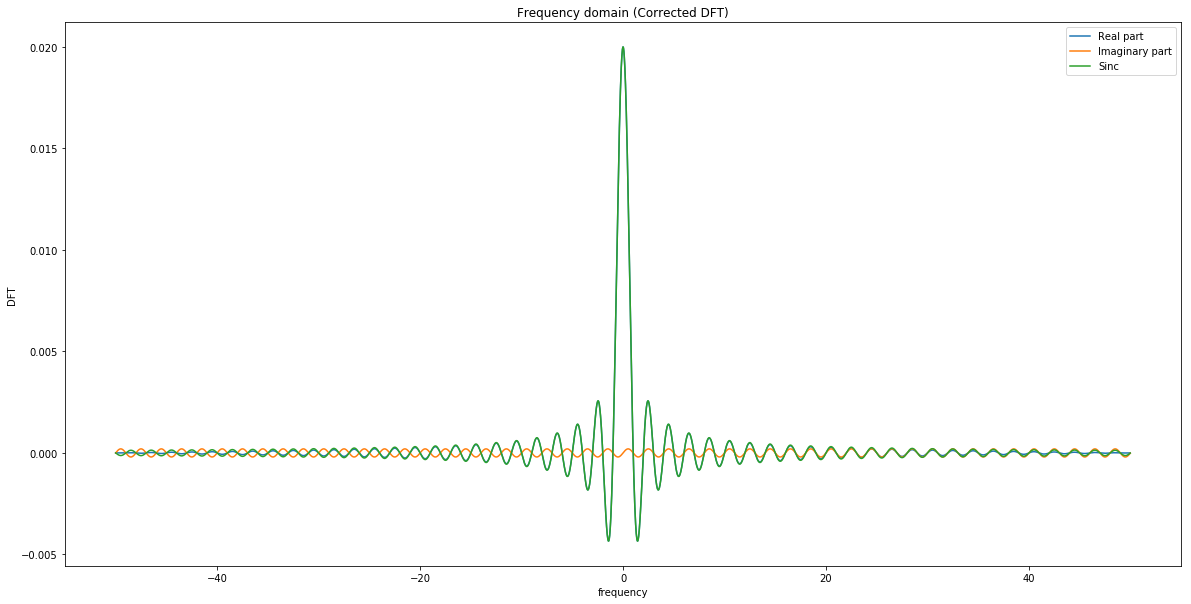

In [15]:
# Arguments
Xs = [Xi, Xi, Xi]
L = [np.real(X_centered_corrected), np.imag(X_centered_corrected), 1/(2*N*dt)*np.sinc(Xi)]
Labels = ["Real part", "Imaginary part", "Sinc"]
title = "Frequency domain (Corrected DFT)"
xLabel = "frequency"
yLabel = "DFT"

plot_signals(Xs, L, Labels, title, xLabel, yLabel)

**Conclusion** : numpy.fft considers signals that start from $0$.

## 4 ) Comparing matrix product and numpy.fft

Let us consider the samplings $t_n = \frac{n}{dN}$ for time and $\xi_k \in [- \frac{N}{2}, \cdots, \frac{N}{2}]\times \frac{1}{dN}$ for frequencies. The DFT is expressed as follows

$$ X_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i t_n \xi_k} = \sum_{n=0}^{N-1} x_n e^{-2\pi i \frac{k}{N} n} = \sum_{n=0}^{N-1}x[n] z_k^{n},\quad k=0, 1, ..., N-1, $$

where $z_k = e^{- 2\pi i  \frac{k}{N}}$. If we denote
$$
\mathbf{X}=\begin{bmatrix}
 X_0\\
 X_1\\
 \vdots\\
 X_{N - 1}
\end{bmatrix},\quad
\mathbf{x}=\begin{bmatrix}
 x_0\\
 x_1\\
 \vdots\\
 x_{N-1}
\end{bmatrix},\text{ and}\quad
\mathbf{D}=\begin{bmatrix}
 1 & z_0^{1} & z_0^{2} & \cdots & z_0^{(N-1)}\\
 1 & z_1^{1} & z_1^{2} & \cdots & z_1^{(N-1)}\\
 \vdots & \vdots & \vdots & \ddots & \vdots\\
 1 & z_{N-1}^{1} & z_{N-1}^{2} & \cdots & z_{N-1}^{N-1}
\end{bmatrix} \, ,
$$ 

We would have 

$$ X = D x $$

and 

$$ x = D^{- 1} X \, .$$

In [16]:
def get_D(F):
    # F : frequencies (in fact the indices of the frequencies)
    N = F.shape[0]
    D = np.empty((N, N), dtype = np.complex128)
    for k in range(N):
        f = F[k]
        z = np.exp(- 2*np.pi*1j*f/N)
        for n in range(N):
            D[k, n] = z**n
    return D

We generate the frequencies (in reality the indices) and compute the matrix $D$.

In [17]:
Freqs_indices = np.linspace(-N, N - 1, 2*N)
D = get_D(Freqs_indices)

We first check that we have the correct frequencies:

In [18]:
print("The maximum difference between the generated frequencies and those of numpy.fft is : ", np.amax( np.abs( Freqs_indices - Xi*(2*N*dt) ) ) )

The maximum difference between the generated frequencies and those of numpy.fft is :  2.2737367544323206e-13


We test if the matrix product gives the correct DFT by comparing the result with the output of numpy.fft :

In [19]:
y = np.dot(D, x)
error = np.abs(y - np.fft.fftshift(X_noshift))/(2*N) # We normalize the outputs
print("Norm of the difference between the matrix product and numpy.fft : ", np.linalg.norm(error))

Norm of the difference between the matrix product and numpy.fft :  1.3615936837415478e-16
